In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import linear_model

In [2]:
prop = pd.read_csv("properties_2016.csv",low_memory=False)

In [3]:
# Columns (22,32,34,49,55) have mixed types.
# Specify dtype option on import or set low_memory=False.

In [4]:
train_df = pd.read_csv('train_2016_v2.csv',parse_dates = ['transactiondate'])

# Preliminary Analysis

In [5]:
#  Extracting the Transaction month out
train_df.describe()
train_df['transaction_month'] = train_df['transactiondate'].dt.month
train_df

,parcelid,logerror,transactiondate,transaction_month
0,11016594,0.0276,2016-01-01,1
1,14366692,-0.1684,2016-01-01,1
2,12098116,-0.0040,2016-01-01,1
3,12643413,0.0218,2016-01-02,1
4,14432541,-0.0050,2016-01-02,1
5,11509835,-0.2705,2016-01-02,1
6,12286022,0.0440,2016-01-02,1
7,17177301,0.1638,2016-01-02,1
8,14739064,-0.0030,2016-01-02,1
9,14677559,0.0843,2016-01-03,1


In [6]:
train_df['parcelid'].nunique()

90150

In [7]:
# pracelid not unique -- Given 90275 , unique -- 90150

In [8]:
prop['bedroomcnt'].nunique(dropna=False)

22

In [9]:
prop['bathroomcnt'].value_counts().sort_values()

19.50          1
14.50          1
12.50          2
19.00          3
11.50          3
1.75           5
17.00          7
20.00         10
10.50         12
18.00         15
0.50          17
15.00         24
16.00         30
14.00         45
9.50          50
13.00         52
8.50         106
11.00        207
12.00        265
7.50         380
10.00        500
6.50        1217
9.00        1329
8.00        4537
5.50        5747
7.00        6149
6.00       16252
4.50       19017
3.50       30755
5.00       38241
1.50       45885
0.00      116614
4.00      132076
2.50      206856
1.00      499330
3.00      629351
2.00     1218664
Name: bathroomcnt, dtype: int64

In [10]:
for x in prop.columns:
    print (x,prop[x].nunique(dropna = False))

parcelid 2985217
airconditioningtypeid 8
architecturalstyletypeid 9
basementsqft 752
bathroomcnt 38
bedroomcnt 22
buildingclasstypeid 6
buildingqualitytypeid 13
calculatedbathnbr 35
decktypeid 2
finishedfloor1squarefeet 4605
calculatedfinishedsquarefeet 12588
finishedsquarefeet12 10671
finishedsquarefeet13 251
finishedsquarefeet15 8817
finishedsquarefeet50 4803
finishedsquarefeet6 4252
fips 4
fireplacecnt 10
fullbathcnt 21
garagecarcnt 25
garagetotalsqft 2241
hashottuborspa 2
heatingorsystemtypeid 15
latitude 852326
longitude 1042551
lotsizesquarefeet 69954
poolcnt 2
poolsizesum 908
pooltypeid10 2
pooltypeid2 2
pooltypeid7 2
propertycountylandusecode 241
propertylandusetypeid 16
propertyzoningdesc 5639
rawcensustractandblock 99394
regionidcity 187
regionidcounty 4
regionidneighborhood 529
regionidzip 406
roomcnt 37
storytypeid 2
threequarterbathnbr 8
typeconstructiontypeid 6
unitcnt 147
yardbuildingsqft17 1637
yardbuildingsqft26 595
yearbuilt 169
numberofstories 13
fireplaceflag 2
stru

In [11]:
# Number of null values in each column
for x in prop.columns:
    print (x,prop[x].isnull().sum())

parcelid 0
airconditioningtypeid 2173698
architecturalstyletypeid 2979156
basementsqft 2983589
bathroomcnt 11462
bedroomcnt 11450
buildingclasstypeid 2972588
buildingqualitytypeid 1046729
calculatedbathnbr 128912
decktypeid 2968121
finishedfloor1squarefeet 2782500
calculatedfinishedsquarefeet 55565
finishedsquarefeet12 276033
finishedsquarefeet13 2977545
finishedsquarefeet15 2794419
finishedsquarefeet50 2782500
finishedsquarefeet6 2963216
fips 11437
fireplacecnt 2672580
fullbathcnt 128912
garagecarcnt 2101950
garagetotalsqft 2101950
hashottuborspa 2916203
heatingorsystemtypeid 1178816
latitude 11437
longitude 11437
lotsizesquarefeet 276099
poolcnt 2467683
poolsizesum 2957257
pooltypeid10 2948278
pooltypeid2 2953142
pooltypeid7 2499758
propertycountylandusecode 12277
propertylandusetypeid 11437
propertyzoningdesc 1006588
rawcensustractandblock 11437
regionidcity 62845
regionidcounty 11437
regionidneighborhood 1828815
regionidzip 13980
roomcnt 11475
storytypeid 2983593
threequarterbathnb

In [12]:
### Plotting the no. of nan values in each column

# missing_df = prop.isnull().sum(axis=0).reset_index()
# missing_df.columns = ['column_name', 'missing_count']
# missing_df = missing_df.ix[missing_df['missing_count']>0]
# missing_df = missing_df.sort_values(by='missing_count')

# ind = np.arange(missing_df.shape[0])
# width = 0.9
# fig, ax = plt.subplots(figsize=(12,18))
# rects = ax.barh(ind, missing_df.missing_count.values, color='yellow',)
# ax.set_yticks(ind)
# ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
# ax.set_xlabel("Count of missing values")
# ax.set_title("Number of missing values in each column")
# plt.show()

## Helper funnctions for analysis 

In [13]:
# % of nan values in each column
def count_nan(input_df):
    x = (len(input_df) - input_df.count())/len(input_df)*100
    return x.sort_values()
# count_nan(prop)

# % of nan values row wise (to see impact how houses with
# maximum data missing impact the log error)
prop1 = prop.tail(11440)


def percentage_func(input_df):
    no_of_columns = (len(input_df.columns)-1) 
    for x in range(len(input_df)-1):
        print (input_df.iloc[x].isnull().sum()/no_of_columns*100)
    return
# percentage_func(prop1)            

# Checking tail(100/200/500) led to the below idea and its calculation and then reverfication 
# using value 11440

# Finding number of rows which are completely null in original data set
# Its too slow -- 11437 rows with no data
prop1 = prop.tail(12000)


def no_of_null_rows(input_df):
    no_of_columns = (len(input_df.columns)-1)
    count = 0
    for x in range(len(input_df)):
        y = (input_df.iloc[x].isnull().sum())
        if y ==  no_of_columns:
            count = count+ 1
#             print (count)
    return count
# no_of_null_rows(prop1)

In [14]:
prop['parcelid'].nunique(dropna=False)

2985217

In [15]:
train_df['parcelid'].nunique(dropna=False)

90150

In [16]:
# Checking whether duplicate parcelids have different log error or not
train_df[train_df['parcelid'].duplicated(keep=False)]
#  Yes they do

,parcelid,logerror,transactiondate,transaction_month
496,13850164,-0.1567,2016-01-05,1
497,13850164,-0.0460,2016-06-29,6
781,14677191,-0.3682,2016-01-06,1
782,14677191,-0.0845,2016-09-12,9
813,11005771,-0.0131,2016-01-06,1
814,11005771,0.0545,2016-06-17,6
967,11183209,-0.0481,2016-01-07,1
968,11183209,-0.0070,2016-09-14,9
1164,11554091,-0.1696,2016-01-07,1
1165,11554091,-0.0954,2016-07-05,7


In [17]:
# Left Join on train_df
new_df_left = train_df.merge(prop,how='left',on = 'parcelid')

In [18]:
# Checking the duplicate rows joined or not after left join
# Note -- Some parcelid >2 hence not 125*2 row
new_df_left['parcelid'].sort_values()
new_df_left[new_df_left['parcelid'].duplicated(keep=False)].reset_index()

,index,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,496,13850164,-0.1567,2016-01-05,1,13.0,NaN,NaN,2.0,3.0,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
1,497,13850164,-0.0460,2016-06-29,6,13.0,NaN,NaN,2.0,3.0,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
2,781,14677191,-0.3682,2016-01-06,1,1.0,NaN,NaN,2.0,2.0,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
3,782,14677191,-0.0845,2016-09-12,9,1.0,NaN,NaN,2.0,2.0,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
4,813,11005771,-0.0131,2016-01-06,1,NaN,NaN,NaN,2.0,5.0,...,NaN,NaN,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,NaN,6.037101e+13
5,814,11005771,0.0545,2016-06-17,6,NaN,NaN,NaN,2.0,5.0,...,NaN,NaN,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,NaN,6.037101e+13
6,967,11183209,-0.0481,2016-01-07,1,1.0,NaN,NaN,3.0,4.0,...,NaN,NaN,222215.0,275555.0,2015.0,53340.0,4375.10,NaN,NaN,6.037910e+13
7,968,11183209,-0.0070,2016-09-14,9,1.0,NaN,NaN,3.0,4.0,...,NaN,NaN,222215.0,275555.0,2015.0,53340.0,4375.10,NaN,NaN,6.037910e+13
8,1164,11554091,-0.1696,2016-01-07,1,NaN,NaN,NaN,2.0,3.0,...,NaN,NaN,208376.0,437155.0,2015.0,228779.0,5448.05,NaN,NaN,6.037272e+13
9,1165,11554091,-0.0954,2016-07-05,7,NaN,NaN,NaN,2.0,3.0,...,NaN,NaN,208376.0,437155.0,2015.0,228779.0,5448.05,NaN,NaN,6.037272e+13


In [19]:
# Finding the different types of dtypes
type_df = new_df_left.dtypes.reset_index()


In [20]:
# Count of different types of column_type
# new_df_left.dtypes.count()
type_df.columns = ['column_name','column_type']
type_df.groupby('column_type').aggregate('count').reset_index()
#  Almost all are float variables except few int and object

,column_type,column_name
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


In [113]:
# Percentage count the number of Nulls in left merged dataset
# earlier in the notebook created customized function count_nan
count_nan(new_df_left)
# df.to_csv(file_name, sep='\t')
# pd.DataFrame(count_nan(new_df_left)).to_dict()
# pd.DataFrame(count_nan(new_df_left)).to_csv('count_nan.csv', index= True)

parcelid                         0.000000
longitude                        0.000000
propertylandusetypeid            0.000000
rawcensustractandblock           0.000000
regionidcounty                   0.000000
roomcnt                          0.000000
latitude                         0.000000
bedroomcnt                       0.000000
fips                             0.000000
assessmentyear                   0.000000
transaction_month                0.000000
transactiondate                  0.000000
logerror                         0.000000
bathroomcnt                      0.000000
landtaxvaluedollarcnt            0.001108
propertycountylandusecode        0.001108
taxvaluedollarcnt                0.001108
taxamount                        0.006646
regionidzip                      0.038770
structuretaxvaluedollarcnt       0.420936
censustractandblock              0.670174
calculatedfinishedsquarefeet     0.732207
yearbuilt                        0.837441
fullbathcnt                      1

In [122]:
print (new_df_left['rawcensustractandblock'].dtype)
# print (new_df_left[new_df_left['unitcnt'] == 70])
# print (new_df_left['landtaxvaluedollarcnt'].mean())

float64


## Helper Functions 

In [23]:
# def pre_process_func(ip_dataframe):
#     my_median = ip_dataframe['landtaxvaluedollarcnt'].median()
# #     my_mode= ip_dataframe['propertylandusetypeid'].mode()
#     assert(False)
#     ##.mode() does not work as we think it works. LOL
#     ip_dataframe['landtaxvaluedollarcnt'] = ip_dataframe['landtaxvaluedollarcnt'].fillna(my_median)
# #     ip_dataframe['propertylandusetypeid'] = ip_dataframe['propertylandusetypeid'].fillna(my_mode)
#     return ip_dataframe

In [38]:
# Functions assisting in creation and visualisation of histogram 
def hist_func(input_variable):
    return int(input_variable/100)*100

def clip_func(ip_variable, clip_value):
    if ip_variable > clip_value:
        ip_variable = clip_value
    return ip_variable

### Analysis for filling na values and '0' values in landtaxvaluedollarcnt

2.0     36534
3.0     19946
1.0     15035
2.5      8091
4.0      3743
1.5      1641
0.0      1165
5.0      1142
3.5      1091
4.5       795
6.0       448
5.5       253
7.0       155
8.0       114
6.5        54
9.0        36
10.0       14
7.5         9
11.0        3
12.0        3
8.5         1
20.0        1
15.0        1
Name: bathroomcnt, dtype: int64
count    90275.000000
mean         2.279474
std          1.004271
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: bathroomcnt, dtype: float64
2.0
0    2.0
dtype: float64


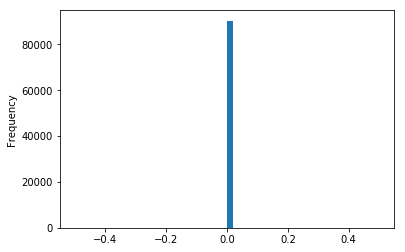

In [130]:
for_histogram = new_df_left['bathroomcnt'].dropna().copy()
print (for_histogram.value_counts())
# lambda_clip_func = lambda my_var : clip_func(my_var, 25)

# for_histogram = for_histogram.apply(lambda_clip_func)

print (for_histogram.describe())
print (for_histogram.median())
print (for_histogram.mode())

for_histogram.apply(hist_func).plot(kind = 'hist',bins = 50)

### Filling na and 0 values in Train Data

In [25]:
# pre_process_func(new_df_left)

### Plotting Number of nan values in left merged df

In [26]:
# missing_df = new_df_left.isnull().sum(axis=0).reset_index()
# missing_df.columns = ['column_name', 'missing_count']
# missing_df = missing_df.ix[missing_df['missing_count']>0]
# missing_df = missing_df.sort_values(by='missing_count')

# ind = np.arange(missing_df.shape[0])
# width = 0.9
# fig, ax = plt.subplots(figsize=(12,18))
# rects = ax.barh(ind, missing_df.missing_count.values, color='red')
# ax.set_yticks(ind)
# ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
# ax.set_xlabel("Count of missing values")
# ax.set_title("Number of missing values in each column")
# plt.show()

### Running linear regression with variable with missing values = 0 

In [27]:
# count_nan(new_df_left)==0

In [28]:
required_col = []
for col in new_df_left.columns:
    if new_df_left[col].isnull().sum() == 0:
        required_col.append(col)
print (required_col)        

sample_df = new_df_left[required_col]

# Original -- Somehow this method is not working
# sample_df=new_df_left[new_df_left[count_nan(new_df_left)==0].index]

x_cols = [col for col in sample_df if ((sample_df[col].dtype=='float64') | (sample_df[col].dtype=='int64'))]

sample_df1=sample_df[x_cols]

sample_df1 = sample_df1.drop('rawcensustractandblock',axis = 1)
sample_df1 = sample_df1.drop('latitude',axis = 1)
sample_df1 = sample_df1.drop(['longitude','parcelid'],axis = 1)

assert (count_nan(sample_df1).sum() == 0)


['parcelid', 'logerror', 'transactiondate', 'transaction_month', 'bathroomcnt', 'bedroomcnt', 'fips', 'latitude', 'longitude', 'propertylandusetypeid', 'rawcensustractandblock', 'regionidcounty', 'roomcnt', 'assessmentyear']


In [29]:
from sklearn.linear_model import LinearRegression
# Creating linear regression object lm
lm = LinearRegression(normalize=True)
# To see available functions present inside lm object do LinearRegression.(tab key)
# LinearRegression.
# lm.fit() -> fits a linear model
# lm.predict() -> Predict Y using the linear model with estimated coefficients
# lm.score() -> Returns the coefficient of determination (R^2). A measure of how well 
# observed outcomes are replicated by the model, as the proportion of total variation of 
# outcomes explained by the model
# .coef_  gives the coefficients and 
# .intercept_  gives the estimated intercepts

y = sample_df1['logerror']
X = sample_df1.drop('logerror',axis = 1)
lm.fit(X,y)

print (lm.score(X,sample_df1['logerror']))

print (lm.coef_)

print (X.columns)

0.00105586749965
[  3.50946581e-04   3.00001981e-03   2.07176918e-03   1.08555918e-04
   1.83262170e-04   1.73405542e-06  -9.17885568e-05   0.00000000e+00]
Index(['transaction_month', 'bathroomcnt', 'bedroomcnt', 'fips',
       'propertylandusetypeid', 'regionidcounty', 'roomcnt', 'assessmentyear'],
      dtype='object')


/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


### Prediction 

In [30]:
my_prediction = lm.predict(X)

# We want mean absoulte error
print ('TRAIN mean absolute error',np.mean(np.abs(my_prediction - y)))

TRAIN mean absolute error 0.0683974061579


# TEST DATA

In [31]:
test_data = pd.read_csv('sample_submission.csv')
test_data= test_data.rename(columns = {'ParcelId' : 'parcelid'})

# Left Join on test_data to import data from 
new_test_data_left = test_data.merge(prop,how='left',on = 'parcelid')

new_test_data_left = new_test_data_left.drop(['201610', '201611', '201612', '201710', '201711', '201712'],axis = 1)

# Keeping the columns which were present in training data

keep_columns = X.columns[1:]

sample_df3 = new_test_data_left[keep_columns]

pre_process_func(sample_df3)

# assert (count_nan(sample_df3).sum() == 0)

NameError: name 'pre_process_func' is not defined

### Filling na and '0' values 

In [ ]:
# Let us just impute the missing values with mean values for the time being
mean_values = sample_df3.mean(axis=0)
test_df_new = sample_df3.fillna(mean_values, inplace=True)

### Predicting '10 '11 and '12 values 

In [ ]:
test_df_new.insert(loc=0,column = 'transaction_month', value=10)

my_test_prediction_10 = lm.predict(test_df_new)

test_df_new = test_df_new.drop('transaction_month',axis = 1)

test_df_new.insert(loc=0,column = 'transaction_month', value=11)

my_test_prediction_11 = lm.predict(test_df_new)

test_df_new = test_df_new.drop('transaction_month',axis = 1)

test_df_new.insert(loc=0,column = 'transaction_month', value=12)

my_test_prediction_12 = lm.predict(test_df_new)

### Adding these predicted values to test_data 

In [ ]:
# df.insert(idx, col_name, value)

test_data['201610'] = my_test_prediction_10
test_data['201611'] = my_test_prediction_11
test_data['201612'] = my_test_prediction_12
test_data['201710'] = my_test_prediction_10
test_data['201711'] = my_test_prediction_11
test_data['201712'] = my_test_prediction_12


print (test_data)

In [ ]:
# df.to_csv(file_name, sep='\t')

# test_data.to_csv('aakanksha_dimri.csv', sep=',',index= False)